In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/yujing/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data_path = "./RNA_DE"
cell_type1 = "Granule"
cell_type2 = "MLI1"

In [3]:
df = pd.read_csv(os.path.join(data_path, 
                              "deg_deseq2_ensemble_{}_{}.txt".format(cell_type1, cell_type2)), 
                 sep = "\t").reset_index().rename(columns = {"index" : "gene"})
df

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Frmpd4,19.894972,-5.670116,0.147451,-38.454248,0.000000e+00,0.000000e+00
1,Gria3,12.230163,-7.144449,0.194484,-36.735321,1.994586e-295,1.299273e-291
2,Shisa6,6.284817,-6.874080,0.211936,-32.434766,8.883132e-231,3.857648e-227
3,Slc24a3,13.896157,-6.205968,0.192553,-32.229913,6.726957e-228,2.190970e-224
4,Kcnma1,32.863702,-7.511812,0.247359,-30.368045,1.451857e-202,3.782959e-199
...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,NaN,NaN,NaN,NaN,NaN
24405,Calml3,0.000000,NaN,NaN,NaN,NaN,NaN
24406,Gm2399,0.000000,NaN,NaN,NaN,NaN,NaN
24407,Gm29501,0.000000,NaN,NaN,NaN,NaN,NaN


/Users/yujing/miniconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


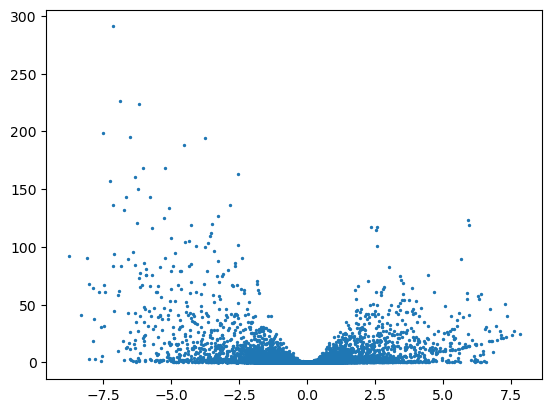

In [4]:
plt.scatter(df["log2FoldChange"], -np.log10(df["padj"]) , s = 2)

# use log fold change 2 / -2 as cuttoff

In [5]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] > 2)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
22,Rbfox3,5.899197,5.901433,0.246002,23.989416,3.586315e-127,2.031413e-124
26,Cadps2,4.863439,5.973630,0.254247,23.495388,4.546480e-122,2.193761e-119
27,Cntn6,8.908129,2.563595,0.109629,23.384187,6.190615e-121,2.880405e-118
28,Caln1,9.350658,2.342743,0.100249,23.369215,8.790339e-121,3.948984e-118
30,Stxbp5l,7.772301,2.527980,0.109254,23.138473,1.899196e-118,7.981526e-116
...,...,...,...,...,...,...,...
2519,Plk5,0.393766,4.329163,1.346187,3.215869,1.300500e-03,6.723378e-03
2554,Plin2,0.465468,2.438914,0.765004,3.188106,1.432082e-03,7.299362e-03
2562,Ubtd1,0.677606,2.261986,0.711179,3.180612,1.469642e-03,7.470345e-03
2585,Gprc5c,0.508911,5.177256,1.637847,3.161013,1.572214e-03,7.920653e-03


In [6]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] < -2)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Frmpd4,19.894972,-5.670116,0.147451,-38.454248,0.000000e+00,0.000000e+00
1,Gria3,12.230163,-7.144449,0.194484,-36.735321,1.994586e-295,1.299273e-291
2,Shisa6,6.284817,-6.874080,0.211936,-32.434766,8.883132e-231,3.857648e-227
3,Slc24a3,13.896157,-6.205968,0.192553,-32.229913,6.726957e-228,2.190970e-224
4,Kcnma1,32.863702,-7.511812,0.247359,-30.368045,1.451857e-202,3.782959e-199
...,...,...,...,...,...,...,...
2609,Fam69c,0.151353,-4.953717,1.578771,-3.137704,1.702769e-03,8.499491e-03
2614,Gm4793,0.136798,-6.199736,1.979709,-3.131640,1.738331e-03,8.660411e-03
2616,Neurod6,0.597600,-5.404424,1.728246,-3.127116,1.765305e-03,8.788077e-03
2620,Slco5a1,0.222808,-4.478522,1.435971,-3.118812,1.815819e-03,9.025750e-03


# proceed with threshold 2 first

In [7]:
# check foldchange Granule cell marker gene
df[df["gene"].isin(["Lypd6", "Gabra6"])]
# fold change is calculated by granule / purkinje

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1110,Gabra6,1.995268,6.476418,1.099021,5.892896,3.794861e-09,4.449995e-08
1884,Lypd6,0.860270,-8.022717,2.026284,-3.959325,7.516201e-05,5.194751e-04


In [8]:
category = np.zeros(df.shape[0]).astype(object)
category[(df["padj"] < 0.01) & (df["log2FoldChange"] > 2)] = cell_type1
category[(df["padj"] < 0.01) & (df["log2FoldChange"] < -2)] = cell_type2

In [9]:
df["category"] = category
df.head()

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,Frmpd4,19.894972,-5.670116,0.147451,-38.454248,0.000000e+00,0.000000e+00,MLI1
1,Gria3,12.230163,-7.144449,0.194484,-36.735321,1.994586e-295,1.299273e-291,MLI1
2,Shisa6,6.284817,-6.874080,0.211936,-32.434766,8.883132e-231,3.857648e-227,MLI1
3,Slc24a3,13.896157,-6.205968,0.192553,-32.229913,6.726957e-228,2.190970e-224,MLI1
4,Kcnma1,32.863702,-7.511812,0.247359,-30.368045,1.451857e-202,3.782959e-199,MLI1


In [10]:
df[df["gene"].isin(["Lypd6","Gabra6"])]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
1110,Gabra6,1.995268,6.476418,1.099021,5.892896,3.794861e-09,4.449995e-08,Granule
1884,Lypd6,0.860270,-8.022717,2.026284,-3.959325,7.516201e-05,5.194751e-04,MLI1


/Users/yujing/miniconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


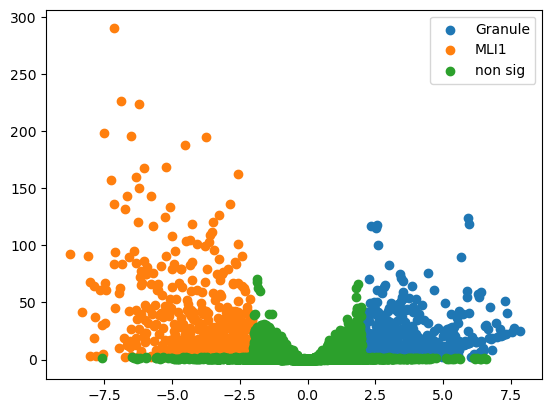

In [11]:
plt.scatter(df[df["category"] == cell_type1]["log2FoldChange"], -np.log10(df[df["category"] == cell_type1]["padj"]), label = cell_type1)
plt.scatter(df[df["category"] == cell_type2]["log2FoldChange"], -np.log10(df[df["category"] == cell_type2]["padj"]), label = cell_type2 )
plt.scatter(df[df["category"] == 0]["log2FoldChange"], -np.log10(df[df["category"] == 0]["padj"]), label = "non sig" )
plt.legend()

In [12]:
DE_genes = df[df["category"] != 0]
DE_genes

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,Frmpd4,19.894972,-5.670116,0.147451,-38.454248,0.000000e+00,0.000000e+00,MLI1
1,Gria3,12.230163,-7.144449,0.194484,-36.735321,1.994586e-295,1.299273e-291,MLI1
2,Shisa6,6.284817,-6.874080,0.211936,-32.434766,8.883132e-231,3.857648e-227,MLI1
3,Slc24a3,13.896157,-6.205968,0.192553,-32.229913,6.726957e-228,2.190970e-224,MLI1
4,Kcnma1,32.863702,-7.511812,0.247359,-30.368045,1.451857e-202,3.782959e-199,MLI1
...,...,...,...,...,...,...,...,...
2612,Rnf144b,1.076485,2.298762,0.733924,3.132151,1.735309e-03,8.651971e-03,Granule
2614,Gm4793,0.136798,-6.199736,1.979709,-3.131640,1.738331e-03,8.660411e-03,MLI1
2616,Neurod6,0.597600,-5.404424,1.728246,-3.127116,1.765305e-03,8.788077e-03,MLI1
2620,Slco5a1,0.222808,-4.478522,1.435971,-3.118812,1.815819e-03,9.025750e-03,MLI1


# Map back to genome

In [14]:
meta = pd.read_csv(os.path.join("../annot", "Final", "mm10_25kb_bins_genes_09022022.csv"))
meta = meta[["name", "chrom", "start", "end", "gene", "100kb name", "100kb bin", "200kb name", "200kb bin"]]
meta["gene"] = meta["gene"].str.replace("-", ".")


# Mismatch between DE gene naming and annotated namming

In [15]:
DE_sig_25kb = meta1.merge(DE_genes)

In [16]:
# missing genes
miss_genes = [x for x in DE_genes["gene"]  if x not in DE_sig_25kb["gene"].unique()]
print ("missing {} gene, {} of detected DE genes".format(len(miss_genes), len(miss_genes) / DE_genes.shape[0]) )

# missing gene are not trivial
miss_df = df[df["gene"].isin(miss_genes)]
miss_df

missing 36 gene, 0.035856573705179286 of detected DE genes


,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
39,Scn2a1,4.248591,2.581130,0.119199,21.654045,5.567322e-104,1.813277e-101,Granule
61,Inadl,4.941397,3.011722,0.153283,19.648168,5.993709e-86,1.259452e-83,Granule
103,Zcchc16,6.610132,-4.636857,0.269749,-17.189547,3.180047e-66,3.945681e-64,MLI1
130,X4933413L06Rik,3.859878,-3.199874,0.199312,-16.054577,5.309986e-58,5.280801e-56,MLI1
139,X9530026P05Rik,4.949001,-5.064917,0.322747,-15.693156,1.684662e-55,1.567698e-53,MLI1
217,X1700025G04Rik,3.053613,5.302570,0.387832,13.672329,1.485622e-42,8.878294e-41,Granule
220,Ptchd2,0.826151,-5.735920,0.420239,-13.649178,2.041686e-42,1.203579e-40,MLI1
277,X1700080N15Rik,1.335575,-7.477149,0.613682,-12.184075,3.779161e-34,1.771040e-32,MLI1
306,Pvrl1,1.226244,-2.881391,0.245452,-11.739121,8.031655e-32,3.408352e-30,MLI1
338,Gm38112,2.035122,7.611602,0.672183,11.323714,1.001381e-29,3.848374e-28,Granule


# OK! tried our best to get all genes

In [17]:
DE_sig_25kb["200kb bin"] = DE_sig_25kb["Start"] // 200000
DE_sig_25kb["200kb name"] = DE_sig_25kb["chrom"] + "-g" + DE_sig_25kb["200kb bin"].astype(str)

In [18]:
cols = ["200kb name","chrom", "200kb bin", "gene", "baseMean", "log2FoldChange", "pvalue", "padj", "category"]

In [19]:
DE_sig_200kb = DE_sig_25kb.copy()

In [20]:
DE_sig_200kb_no_dup = DE_sig_200kb.drop_duplicates(subset=["gene", "200kb name"], keep='first')
DE_sig_200kb_no_dup

,name,chrom,Start,End,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category,200kb bin,200kb name
0,chr1-19,chr1,3450000,3475000,Gm1992,2.370217,-2.178294,0.308858,-7.052726,1.754457e-12,2.600348e-11,MLI1,17,chr1-g17
3,chr1-140,chr1,6475000,6500000,St18,6.810724,4.699486,0.617845,7.606251,2.821615e-14,4.856011e-13,Granule,32,chr1-g32
8,chr1-145,chr1,6600000,6625000,St18,6.810724,4.699486,0.617845,7.606251,2.821615e-14,4.856011e-13,Granule,33,chr1-g33
16,chr1-153,chr1,6800000,6825000,St18,6.810724,4.699486,0.617845,7.606251,2.821615e-14,4.856011e-13,Granule,34,chr1-g34
19,chr1-215,chr1,8350000,8375000,Sntg1,8.222263,-4.992338,0.222833,-22.403964,3.600735e-111,1.379717e-108,MLI1,41,chr1-g41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7897,chrX-6475,chrX,167600000,167625000,Frmpd4,19.894972,-5.670116,0.147451,-38.454248,0.000000e+00,0.000000e+00,MLI1,838,chrX-g838
7905,chrX-6483,chrX,167800000,167825000,Frmpd4,19.894972,-5.670116,0.147451,-38.454248,0.000000e+00,0.000000e+00,MLI1,839,chrX-g839
7913,chrX-6491,chrX,168000000,168025000,Frmpd4,19.894972,-5.670116,0.147451,-38.454248,0.000000e+00,0.000000e+00,MLI1,840,chrX-g840
7921,chrX-6499,chrX,168200000,168225000,Frmpd4,19.894972,-5.670116,0.147451,-38.454248,0.000000e+00,0.000000e+00,MLI1,841,chrX-g841


In [21]:
# get norm counts
norm_counts = pd.read_csv(os.path.join(data_path, "ensembl_gene_counts_normalized.txt"), sep = "\t")

idx = (norm_counts.iloc[0].isin([cell_type1 ,cell_type2, "CLUSTER"])).values

norm_counts = norm_counts.iloc[:, idx]

# take a look
norm_counts.head()

/var/folders/j4/wgbmg2rn5q768jr012zxqngh0000gn/T/ipykernel_54868/3433087015.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  norm_counts = pd.read_csv(os.path.join(data_path, "ensembl_gene_counts_normalized.txt"), sep = "\t")


,ID,VIIa_F002.6,VIIa_M002.6,VIIa_M006.6,VIIb_F002.6,VIIb_M002.5,VIIb_M006.6,VIIc_M002.6,VIId_M002.6,VIIa_F002.8,VIIa_M002.9,VIIa_M006.9,VIIb_F002.8,VIIb_M002.7,VIIb_M006.8,VIIc_M002.8,VIId_M002.9
0,CLUSTER,Granule,Granule,Granule,Granule,Granule,Granule,Granule,Granule,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1
1,Xkr4,7.55574393741819,15.6081641844892,17.7838761252477,12.9276361921097,12.8406454612401,15.8110321946947,14.0728376325053,12.9517072272098,53.5948272840804,43.279884611744,61.2805288139014,41.5969990510138,49.2577139285487,53.8271418006571,59.7718668656137,62.6031475874452
2,Gm1992,0.930780050261661,1.75309090477958,1.64065371998299,1.41672725392983,1.59244225208293,1.41543319749047,1.90818137389903,2.25247082212345,5.62675352063836,8.41553311895023,7.47830182135745,5.25761326295341,5.61163829565745,4.61375501148489,10.3829064508343,12.0060830989621
3,Gm37381,0,0.0848269792635282,0,0.0590303022470762,0,0.0482534044599025,0.0265025190819309,0.0244833785013418,0.140668838015959,0.300554754248222,0.207730606148818,0,0,0,0,0
4,Rp1,0.109503535324901,0.0565513195090188,0.0607649525919625,0,0.151661166865041,0.0482534044599025,0.132512595409655,0.0979335140053673,0,0,0.207730606148818,0,0,0,0,0


In [22]:
n1 = ["{}_{}".format(cell_type1, i) for i in range(1, 9)]
n2 = ["{}_{}".format(cell_type2, i) for i in range(1, 9)]

norm_counts.columns = ['gene'] + n1 + n2
norm_counts = norm_counts.iloc[1:].reset_index(drop = True)
norm_counts.head()
# turn dataframes to numeric
norm_counts[n1 + n2] = norm_counts[n1 + n2].apply(pd.to_numeric, errors='coerce')

In [23]:
norm_counts["{}_mean".format(cell_type1)] = norm_counts[n1].mean(axis=1)
norm_counts["{}_mean".format(cell_type2)] = norm_counts[n2].mean(axis=1)
norm_counts

,gene,Granule_1,Granule_2,Granule_3,Granule_4,Granule_5,Granule_6,Granule_7,Granule_8,MLI1_1,MLI1_2,MLI1_3,MLI1_4,MLI1_5,MLI1_6,MLI1_7,MLI1_8,Granule_mean,MLI1_mean
0,Xkr4,7.555744,15.608164,17.783876,12.927636,12.840645,15.811032,14.072838,12.951707,53.594827,43.279885,61.280529,41.596999,49.257714,53.827142,59.771867,62.603148,13.693955,53.151514
1,Gm1992,0.930780,1.753091,1.640654,1.416727,1.592442,1.415433,1.908181,2.252471,5.626754,8.415533,7.478302,5.257613,5.611638,4.613755,10.382906,12.006083,1.613722,7.424073
2,Gm37381,0.000000,0.084827,0.000000,0.059030,0.000000,0.048253,0.026503,0.024483,0.140669,0.300555,0.207731,0.000000,0.000000,0.000000,0.000000,0.000000,0.030387,0.081119
3,Rp1,0.109504,0.056551,0.060765,0.000000,0.151661,0.048253,0.132513,0.097934,0.000000,0.000000,0.207731,0.000000,0.000000,0.000000,0.000000,0.000000,0.082148,0.025966
4,Sox17,0.000000,0.000000,0.020255,0.000000,0.000000,0.016084,0.026503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007855,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24405,Calml3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24406,Gm2399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24407,Gm29501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
# filter out DE genes get norm counts
DE_sig_200kb_no_dup = DE_sig_200kb_no_dup.merge(norm_counts[["gene","{}_mean".format(cell_type1), "{}_mean".format(cell_type2)]])
DE_sig_200kb_no_dup.to_csv(os.path.join(data_path, 
                                        "{}_{}_DE_sig_sum_200kb_no_dup.csv".format(cell_type1, cell_type2)), index = None)

In [25]:
DE_sig_200kb_no_dup

,name,chrom,Start,End,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category,200kb bin,200kb name,Granule_mean,MLI1_mean
0,chr1-19,chr1,3450000,3475000,Gm1992,2.370217,-2.178294,0.308858,-7.052726,1.754457e-12,2.600348e-11,MLI1,17,chr1-g17,1.613722,7.424073
1,chr1-140,chr1,6475000,6500000,St18,6.810724,4.699486,0.617845,7.606251,2.821615e-14,4.856011e-13,Granule,32,chr1-g32,10.961785,0.449770
2,chr1-145,chr1,6600000,6625000,St18,6.810724,4.699486,0.617845,7.606251,2.821615e-14,4.856011e-13,Granule,33,chr1-g33,10.961785,0.449770
3,chr1-153,chr1,6800000,6825000,St18,6.810724,4.699486,0.617845,7.606251,2.821615e-14,4.856011e-13,Granule,34,chr1-g34,10.961785,0.449770
4,chr1-215,chr1,8350000,8375000,Sntg1,8.222263,-4.992338,0.222833,-22.403964,3.600735e-111,1.379717e-108,MLI1,41,chr1-g41,0.696159,22.765713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,chrX-6475,chrX,167600000,167625000,Frmpd4,19.894972,-5.670116,0.147451,-38.454248,0.000000e+00,0.000000e+00,MLI1,838,chrX-g838,2.665409,138.093827
1818,chrX-6483,chrX,167800000,167825000,Frmpd4,19.894972,-5.670116,0.147451,-38.454248,0.000000e+00,0.000000e+00,MLI1,839,chrX-g839,2.665409,138.093827
1819,chrX-6491,chrX,168000000,168025000,Frmpd4,19.894972,-5.670116,0.147451,-38.454248,0.000000e+00,0.000000e+00,MLI1,840,chrX-g840,2.665409,138.093827
1820,chrX-6499,chrX,168200000,168225000,Frmpd4,19.894972,-5.670116,0.147451,-38.454248,0.000000e+00,0.000000e+00,MLI1,841,chrX-g841,2.665409,138.093827


In [26]:
temp = {"category" : ",".join, 
        "{}_mean".format(cell_type1) : sum,
        "{}_mean".format(cell_type2) : sum,
        "gene": ",".join}
final_200kb = DE_sig_200kb_no_dup.groupby("200kb name").agg(temp).reset_index()

In [27]:
final_200kb

,200kb name,category,Granule_mean,MLI1_mean,gene
0,chr1-g106,"MLI1,MLI1",0.764419,5.399346,"Tmem14a,Kcnq5"
1,chr1-g107,MLI1,0.628376,4.785520,Kcnq5
2,chr1-g108,MLI1,0.628376,4.785520,Kcnq5
3,chr1-g109,MLI1,0.628376,4.785520,Kcnq5
4,chr1-g111,Granule,107.981704,15.845445,Rims1
...,...,...,...,...,...
1690,chrX-g838,MLI1,2.665409,138.093827,Frmpd4
1691,chrX-g839,MLI1,2.665409,138.093827,Frmpd4
1692,chrX-g840,MLI1,2.665409,138.093827,Frmpd4
1693,chrX-g841,MLI1,2.665409,138.093827,Frmpd4


In [28]:
# further format
final_200kb["chrom"]  = final_200kb["200kb name"].str.split("-").str[0]
# add small number to 0
final_200kb = final_200kb.replace(0, 0.05)
final_200kb 

,200kb name,category,Granule_mean,MLI1_mean,gene,chrom
0,chr1-g106,"MLI1,MLI1",0.764419,5.399346,"Tmem14a,Kcnq5",chr1
1,chr1-g107,MLI1,0.628376,4.785520,Kcnq5,chr1
2,chr1-g108,MLI1,0.628376,4.785520,Kcnq5,chr1
3,chr1-g109,MLI1,0.628376,4.785520,Kcnq5,chr1
4,chr1-g111,Granule,107.981704,15.845445,Rims1,chr1
...,...,...,...,...,...,...
1690,chrX-g838,MLI1,2.665409,138.093827,Frmpd4,chrX
1691,chrX-g839,MLI1,2.665409,138.093827,Frmpd4,chrX
1692,chrX-g840,MLI1,2.665409,138.093827,Frmpd4,chrX
1693,chrX-g841,MLI1,2.665409,138.093827,Frmpd4,chrX


In [29]:
# rank final output
final_200kb["chrom_id"] = final_200kb["chrom"].str[3:].replace("X", 20).astype(int)
final_200kb["group"] = final_200kb["200kb name"].str.split("-").str[1].str[1:].astype(int)
final_200kb = final_200kb.sort_values(by = ["chrom_id", "group"])
final_200kb["log2FC_{}2{}".format(cell_type1[:1], cell_type2[:1])] =  np.log2(final_200kb["{}_mean".format(cell_type1)].values / final_200kb["{}_mean".format(cell_type2)].values)
final_200kb

,200kb name,category,Granule_mean,MLI1_mean,gene,chrom,chrom_id,group,log2FC_G2M
10,chr1-g17,MLI1,1.613722,7.424073,Gm1992,chr1,1,17,-2.201818
25,chr1-g32,Granule,10.961785,0.449770,St18,chr1,1,32,4.607152
27,chr1-g33,Granule,10.961785,0.449770,St18,chr1,1,33,4.607152
28,chr1-g34,Granule,10.961785,0.449770,St18,chr1,1,34,4.607152
41,chr1-g41,MLI1,0.696159,22.765713,Sntg1,chr1,1,41,-5.031301
...,...,...,...,...,...,...,...,...,...
1690,chrX-g838,MLI1,2.665409,138.093827,Frmpd4,chrX,20,838,-5.695148
1691,chrX-g839,MLI1,2.665409,138.093827,Frmpd4,chrX,20,839,-5.695148
1692,chrX-g840,MLI1,2.665409,138.093827,Frmpd4,chrX,20,840,-5.695148
1693,chrX-g841,MLI1,2.665409,138.093827,Frmpd4,chrX,20,841,-5.695148


In [30]:
final_200kb.to_csv(os.path.join(data_path, "{}_{}_DE_200kb_FoldChange.csv".format(cell_type1, cell_type2)), index = False)